In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#path to project 
path = r'/Users/libertyonia/Documents/Covid' 

In [3]:
#import cleaned data 
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cases_deaths_gender_2.csv'))

# Clean and wrangle data

In [4]:
#check the dataframe
df.head()

,Unnamed: 0,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
0,0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South
1,1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South
2,2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South
3,3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South
4,4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South


In [5]:
#drop unnamed column 
df = df.drop(columns = 'Unnamed: 0')

In [6]:
#check df columns 
df.columns.to_list()

['county_code',
 'county',
 'state',
 'lat',
 'long',
 'date',
 'cases',
 'state_code',
 'deaths',
 'male',
 'female',
 'median_age',
 'population',
 'female_percentage',
 'region']

In [7]:
#create a daily_deaths columns 

#sort df by 'state', county' and 'date'
df = df.sort_values(by=['state','county', 'date'])

#group by 'state' and 'county' and calculate the daily deaths using .diff()
df['daily_deaths'] = df.groupby(['state','county'])['deaths'].diff()

# Drop rows with NaN values in 'daily_deaths' column
df.dropna(subset=['daily_deaths'], inplace=True)

#convert any negative values to zero
df['daily_deaths'] = df['daily_deaths'].apply(lambda x: max(0, x))


In [8]:
#check if the function worked
check = df.groupby('state').agg({'daily_deaths': 'sum'})

In [9]:
check

,daily_deaths
state,
Alabama,21404.0
Alaska,1471.0
Arizona,33672.0
Arkansas,13438.0
California,103667.0
Colorado,14121.0
Connecticut,12271.0
Delaware,3332.0
Florida,88597.0


In [10]:
#create a daily_cases columns 

#sort df by 'state', county' and 'date'
df = df.sort_values(by=['state','county', 'date'])

#group by 'state' and 'county' and calculate the daily deaths using .diff()
df['daily_cases'] = df.groupby(['state','county'])['cases'].diff()

# Drop rows with NaN values in 'daily_cases' column
df.dropna(subset=['daily_cases'], inplace=True)

#convert any negative values to zero
df['daily_cases'] = df['daily_cases'].apply(lambda x: max(0, x))

In [11]:
#check if the function worked
check2 = df.groupby('state').agg({'daily_cases': 'sum'})
check2

,daily_cases
state,
Alabama,1650295.0
Alaska,303154.0
Arizona,2437442.0
Arkansas,971331.0
California,12087438.0
Colorado,1758128.0
Connecticut,970730.0
Delaware,331033.0
Florida,7544468.0


In [12]:
#check the new dataframe 
df.head()

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-27,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0
6,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-28,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0


In [13]:
#check the columns and rows of the df
df.shape

(3389139, 17)

In [14]:
#check for duplicates
df_dups = df[df.duplicated()]
df_dups
#there are no duplicates 

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases


In [15]:
#check for missing data 
df.isnull().sum()
#there are no missing data 

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
daily_deaths         0
daily_cases          0
dtype: int64

In [16]:
#check for mixed data types 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#there are no mixed data types 

In [17]:
# Convert the 'dates' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract month and year and create new columns
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [18]:
#check if above function worked
df.head(20)

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region,daily_deaths,daily_cases,month,year
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-27,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
6,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-28,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
7,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-29,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
8,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-30,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
9,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-31,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,1,2020
10,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-02-01,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,2,2020
11,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-02-02,0,AL,0,26874,28326,37.8,55200,51.315217,South,0.0,0.0,2,2020


In [19]:
#upload this new data set to Prepared Data 
df.to_csv(os.path.join(path,'02 Data','Prepared Data','Ach6_T4_data.csv'))

# Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [20]:
#aggregate data 
agg = {
    'daily_deaths':'sum',
    'daily_cases':'sum',
    'population':'first',
    'female': 'first',
    'male': 'first'
}

In [21]:
#group data by state and county
df_grouped = df.groupby(['year','state','county']).agg(agg)

In [22]:
# Convert the result to a new DataFrame
df_grouped = pd.DataFrame(df_grouped.reset_index())

In [23]:
#rename the column names
df_grouped.columns = ['year','state','county','total_deaths','total_cases','population','female','male']

df_grouped

,year,state,county,total_deaths,total_cases,population,female,male
0,2020,Alabama,Autauga,54.0,4190.0,55200,28326,26874
1,2020,Alabama,Baldwin,161.0,13601.0,208107,106919,101188
2,2020,Alabama,Barbour,32.0,1514.0,25782,12085,13697
3,2020,Alabama,Bibb,51.0,1834.0,22527,10375,12152
4,2020,Alabama,Blount,63.0,4641.0,57645,29211,28434
...,...,...,...,...,...,...,...,...
12559,2023,Wyoming,Sweetwater,3.0,74.0,44117,21235,22882
12560,2023,Wyoming,Teton,0.0,113.0,23059,11148,11911
12561,2023,Wyoming,Uinta,0.0,73.0,20609,10104,10505
12562,2023,Wyoming,Washakie,3.0,27.0,8129,3992,4137


In [24]:
#total instances in the data
df_grouped.shape

(12564, 8)

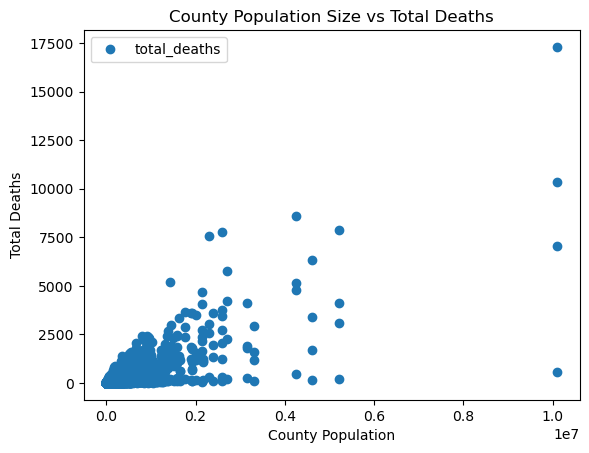

In [25]:
#check the relationship between county population and total_deaths
df_grouped.plot(x = 'population', y='total_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('County Population Size vs Total Deaths')  
plt.xlabel('County Population')  
plt.ylabel('Total Deaths')  
plt.show()

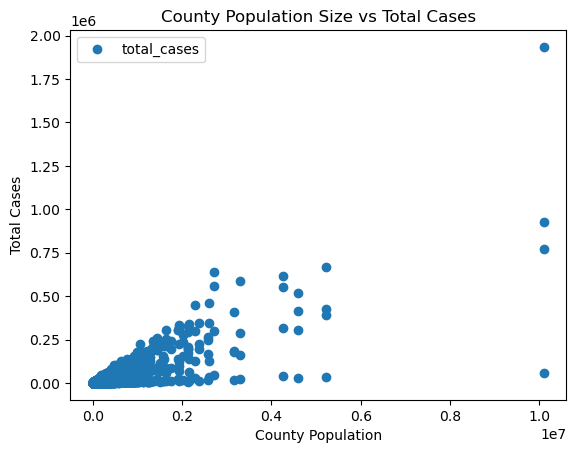

In [26]:
#check the relationship between county population and total_cases
df_grouped.plot(x = 'population', y='total_cases',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('County Population Size vs Total Cases')  
plt.xlabel('County Population')  
plt.ylabel('Total Cases')  
plt.show()

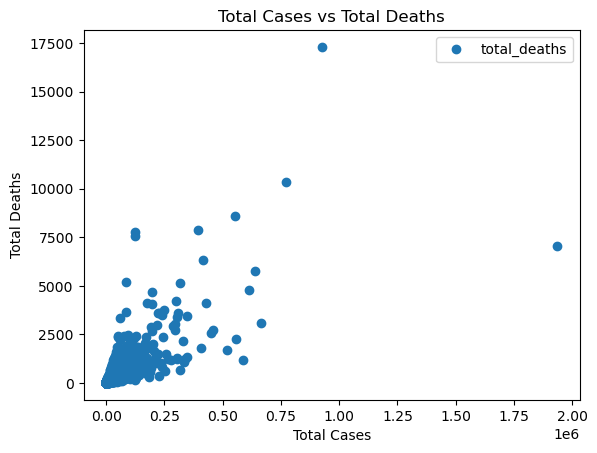

In [27]:
#check the relationship between total_cases and total_deaths
df_grouped.plot(x = 'total_cases', y='total_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Cases vs Total Deaths')  
plt.xlabel('Total Cases')  
plt.ylabel('Total Deaths')  
plt.show()

# State your hypothesis in a markdown cell within your Jupyter notebook.

Covid-19 cases may lead to mortality. If a county has a high number of cases, then it is more likely that it will have a high number of covid mortality. 

# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [28]:
#reshape the variable 
X = df_grouped['total_cases'].values.reshape(-1, 1)
y =df_grouped['total_deaths'].values.reshape(-1, 1)

# Split the data into two sets: a training set and a test set.

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the data.
- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

In [30]:
#create a regression object 
regression = LinearRegression()

In [31]:
#fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
#predict the values of y using X

y_regression = regression.predict(X_test)

# Create a plot that shows the regression line on the test set.

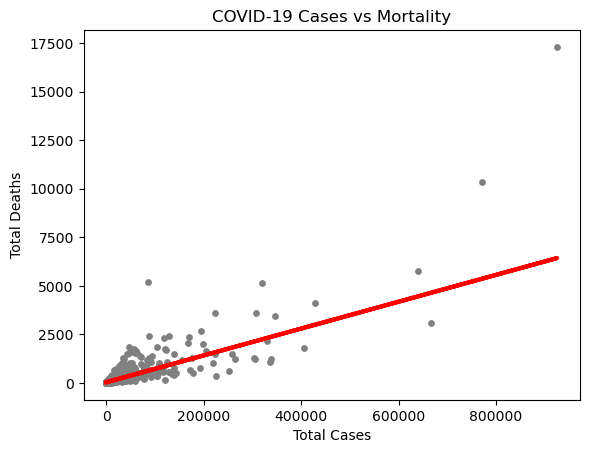

In [33]:
#create a plot that shows the regression line on the test set 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_regression, color='red', linewidth =3)
plot_test.title('COVID-19 Cases vs Mortality')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths')
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

Just by looking at the plot, I believe that the slope is not steep enough for the data. I believe it should be steeper, because there are more dots on top of the line than at the bottom. However, most of the data points are around the line. 

# Check the model performance statistics—MSE and R2 score

In [34]:
#create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_regression) 
r2 = r2_score(y_test, y_regression) 

In [35]:
#print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00691311]]
Mean squared error:  65182.62012188481
R2 score:  0.6512854273403894


# Compare the predicted y values with the actual y values in a dataframe.

In [36]:
#create a dataframe comparing the actual and predicted values of y.

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_regression.flatten()})
comparison.head(30)

,Actual,Predicted
0,2.0,34.766855
1,4.0,36.647220
2,14.0,38.313279
3,49.0,57.234449
4,58.0,63.829552
5,732.0,169.524024
6,1.0,33.100797
7,24.0,37.062007
8,5.0,36.329217
9,37.0,37.808622


# Include your thoughts on how well the model performed on the test set in a markdown cell.
- Include any reflections you have on the impact of possible data bias.

The model did not perform well. When comparing the y_predicted values to the actual values, I notice that the model is bad a predicting lower values. For instance, a y-value of 2 was predicted to be 33. The dataset contains many data points in the extremes with high total cases and high total deaths. I believe the extremes have biased the model and caused it to over-estimate deaths. 

The MSE is 65182.62, which is high for the data set. The regression line is far from the data points and is not accurate. 

R2 is 0.65. R2 is a metric that explains the variance in the data. 0.65 isn't too bad, but it may be improved by removing extremes.Removing extremes may add other bias. 

Overall, I don't believe the model did well. 

# Remove Outliers using standard deviation 

array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

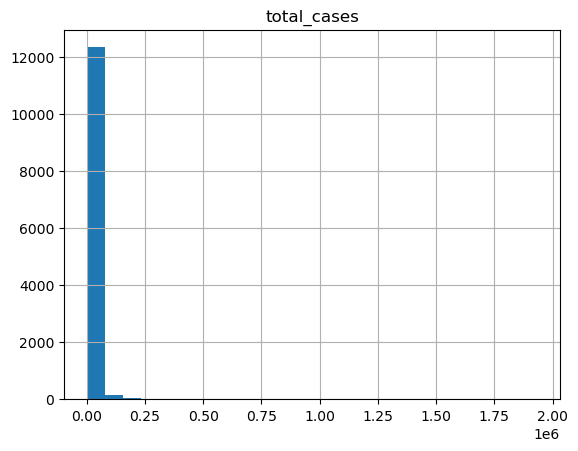

In [37]:
#create a histogram of the total cases
df_grouped.hist(column = 'total_cases', bins = 25)

In [38]:
#Find the standard deviation and average of the total_cases column 
std = df_grouped['total_cases'].std()
print('Standard Deviation:', std)

avg = df_grouped['total_cases'].mean()
print('Average:', avg)

Standard Deviation: 33971.547666219434
Average: 8044.493632601082


In [39]:
#value that is +3 SD of the average for total_cases
three_sd = avg+(3*std)
print('+3 SD:', three_sd)

+3 SD: 109959.13663125937


In [40]:
#find the values above the +3 SD
outlier_cases = df_grouped[df_grouped['total_cases'] >= three_sd]
outlier_cases

,year,state,county,total_deaths,total_cases,population,female,male
103,2020,Arizona,Maricopa,5124.0,318827.0,4253913,2149768,2104145
204,2020,California,Los Angeles,10359.0,771519.0,10098052,5121264,4976788
215,2020,California,Orange,1883.0,182684.0,3164182,1601753,1562429
218,2020,California,Riverside,1966.0,194425.0,2383286,1197098,1186188
221,2020,California,San Bernardino,1621.0,205026.0,2135413,1072941,1062472
...,...,...,...,...,...,...,...,...
9138,2022,Virginia,Fairfax,452.0,134558.0,1143529,576883,566646
9250,2022,Washington,King,1226.0,337178.0,2163257,1080317,1082940
9260,2022,Washington,Pierce,583.0,129294.0,859840,432269,427571
9264,2022,Washington,Snohomish,542.0,122306.0,786620,392094,394526


In [41]:
#check the shape of the original dataframe 
df_grouped.shape

(12564, 8)

In [42]:
#update df_grouped dataframe 
df_grouped = df_grouped[df_grouped['total_cases'] <= three_sd]

#check the shape 
df_grouped.shape

(12438, 8)

array([[<Axes: title={'center': 'total_deaths'}>]], dtype=object)

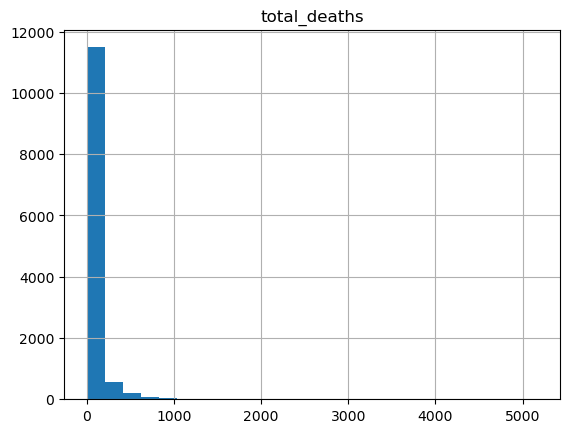

In [43]:
#create a histogram of the total_deaths column
df_grouped.hist(column = 'total_deaths', bins = 25)

In [44]:
#Find the standard deviation and average of the deaths column 
std_deaths = df_grouped['total_deaths'].std()
print('Standard Deviation:', std_deaths)

avg_deaths = df_grouped['total_deaths'].mean()
print('Average:', avg_deaths)

Standard Deviation: 170.86589254126707
Average: 68.83558449911561


In [45]:
#value that is +3 SD of the average for total_deaths
three_sd_deaths = avg_deaths+(3*std_deaths)
print('+3 SD:', three_sd_deaths)

+3 SD: 581.4332621229169


In [46]:
#find the values above the +3 SD
outlier_cases_deaths = df_grouped[df_grouped['total_deaths'] >= three_sd_deaths]
outlier_cases_deaths

,year,state,county,total_deaths,total_cases,population,female,male
36,2020,Alabama,Jefferson,704.0,52339.0,659892,347544,312348
106,2020,Arizona,Pima,1088.0,69530.0,1019722,517843,501879
186,2020,California,Alameda,620.0,54473.0,1643700,836529,807171
195,2020,California,Fresno,716.0,71596.0,978130,490194,487936
219,2020,California,Sacramento,869.0,67622.0,1510023,772281,737742
...,...,...,...,...,...,...,...,...
8076,2022,New Mexico,Bernalillo,837.0,95228.0,677692,345421,332271
8151,2022,New York,Richmond,611.0,100711.0,474101,244677,229424
8380,2022,Ohio,Montgomery,584.0,67652.0,532034,275880,256154
8466,2022,Oklahoma,Oklahoma,670.0,108452.0,782051,399291,382760


In [47]:
#check the shape of the original dataframe 
df_grouped.shape

(12438, 8)

In [48]:
#update df_grouped dataframe 
df_grouped = df_grouped[df_grouped['total_deaths'] <= three_sd_deaths]

#check the shape 
df_grouped.shape

(12215, 8)

# Run another regression without the outliers

In [49]:
#reshape the variable 
X = df_grouped['total_cases'].values.reshape(-1, 1)
y =df_grouped['total_deaths'].values.reshape(-1, 1)

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
#create a regression object 
regression2 = LinearRegression()

In [52]:
#fit the regression object onto the training set

regression2.fit(X_train, y_train)

LinearRegression()

In [53]:
#predict the values of y using X

y_regression2 = regression2.predict(X_test)

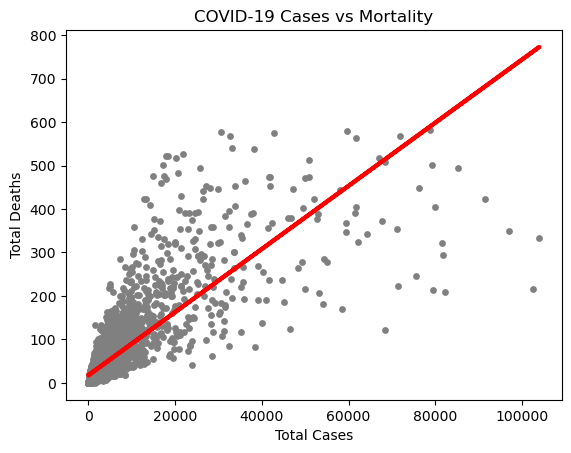

In [54]:
#create a plot that shows the regression line on the test set without the outliers

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_regression2, color='red', linewidth =3)
plot_test.title('COVID-19 Cases vs Mortality')
plot_test.xlabel('Total Cases')
plot_test.ylabel('Total Deaths')
plot_test.show()

In [55]:
#create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_regression2) 
r2 = r2_score(y_test, y_regression2) 

In [56]:
#print the model summary statistics

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00726161]]
Mean squared error:  2554.339428675405
R2 score:  0.6385702406764464


### Previous Answer
- Slope: [[0.00691311]]
- Mean squared error:  65182.62012188481
- R2 score:  0.6512854273403894

In [57]:
#create a dataframe comparing the actual and predicted values of y.

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_regression2.flatten()})
comparison.head(30)

,Actual,Predicted
0,4.0,18.705436
1,3.0,18.821621
2,156.0,78.105443
3,21.0,22.917172
4,20.0,27.826024
5,156.0,116.359628
6,24.0,27.266879
7,2.0,19.293626
8,0.0,19.155656
9,6.0,24.652698


# Did removing the outliers improve the model
The new slope is 0.00726161. The mean squared error was reduced from 65182.62 to 2554.33. This means that the points are generally closer to the regression line when the outliers are excluded. The r-squared value went from 0.65 to around 0.64. The model is still poorly overestimating the lower y-values. However, it does a better job than the first model. In conclusion, I don't think this is model is a good fit. 

# Regression for population vs cases

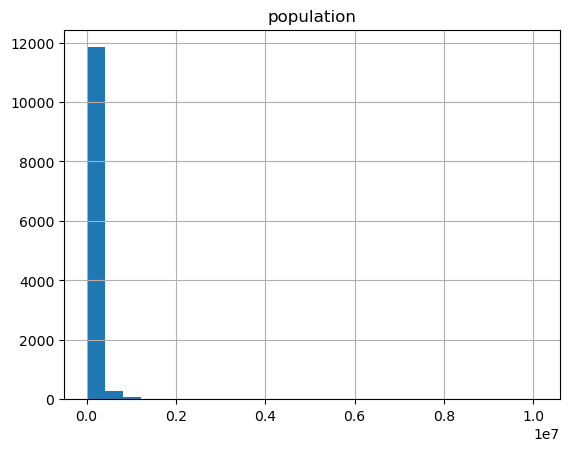

In [58]:
#create a histogram of the population column
histogram = df_grouped.hist(column = 'population', bins = 25)

In [59]:
#find the standard deviation and average of the population column 
std_pop = df_grouped['population'].std()
avg_pop = df_grouped['population'].mean()

print('Standard Deviation:', std_pop)
print('Average:', avg_pop)

Standard Deviation: 190688.85755186077
Average: 71324.67220630373


In [60]:
#find the +3 SD 
three_sd_pop = avg_pop + (3 * std_pop)
print('+3D:', three_sd_pop)

+3D: 643391.244861886


In [61]:
#find the subset of outliers 
population_outliers = df_grouped[df_grouped['population'] >= three_sd_pop]
population_outliers

,year,state,county,total_deaths,total_cases,population,female,male
192,2020,California,Contra Costa,357.0,41310.0,1133247,579546,553701
200,2020,California,Kern,512.0,68969.0,883053,430407,452646
223,2020,California,San Francisco,185.0,24309.0,870044,426074,443970
226,2020,California,San Mateo,204.0,24925.0,765935,388084,377851
241,2020,California,Ventura,268.0,42676.0,848112,428524,419588
...,...,...,...,...,...,...,...,...
12279,2023,Virginia,Fairfax,62.0,9325.0,1143529,576883,566646
12391,2023,Washington,King,131.0,12060.0,2163257,1080317,1082940
12401,2023,Washington,Pierce,50.0,6104.0,859840,432269,427571
12405,2023,Washington,Snohomish,61.0,5025.0,786620,392094,394526


In [62]:
#shape of the df_grouped dataframe 
df_grouped.shape

(12215, 8)

In [63]:
#remove the outlier for population 
df_grouped = df_grouped[df_grouped['population'] <= three_sd_pop]

In [64]:
#check if outliers were dropped
df_grouped.shape

(12062, 8)

# Create a regression for population vs cases

In [65]:
#reshape the variable 
X = df_grouped['population'].values.reshape(-1, 1)
y =df_grouped['total_cases'].values.reshape(-1, 1)

In [66]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
#create a regression object 
regression3 = LinearRegression()

In [68]:
#fit the regression object onto the training set

regression3.fit(X_train, y_train)

LinearRegression()

In [69]:
#predict the values of y using X

y_regression3 = regression3.predict(X_test)

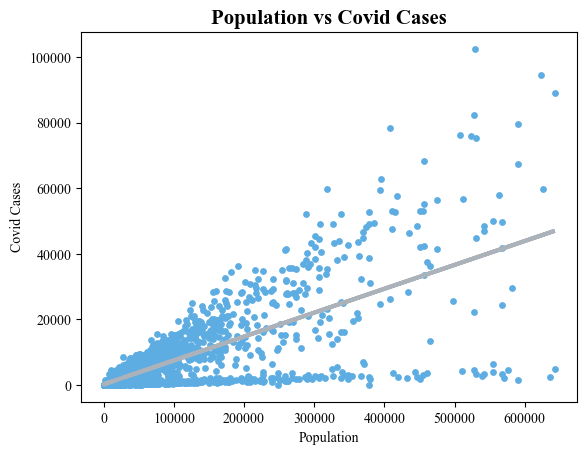

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

# Set the font family to Times New Roman for the entire plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'


#create a plot that shows the regression line on the test set without the outliers

plot_test = plt
plot_test.scatter(X_test, y_test, color='#5DADE2', s = 15)
plot_test.plot(X_test, y_regression3, color='#ABB2B9', linewidth =3)
plot_test.title('Population vs Covid Cases', fontsize=15, fontweight='bold') 
plot_test.xlabel('Population')
plot_test.ylabel('Covid Cases')
plot_test.show()

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/linear_reg.png'

# Save the figure to the specified folder
plt.savefig(file_path, dpi=300, bbox_inches='tight')

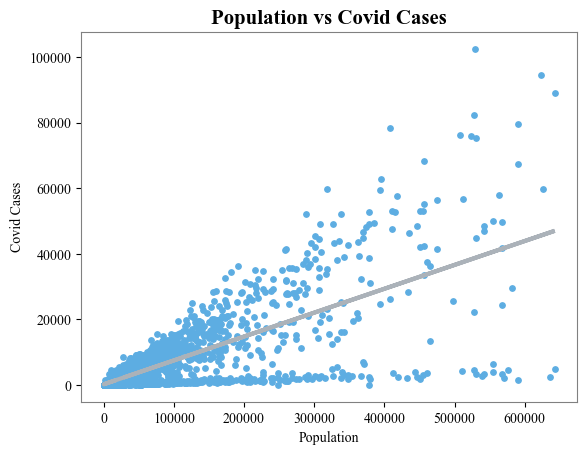

In [92]:
import matplotlib.pyplot as plt

# Set the font family to Times New Roman for the entire plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

# Create a plot that shows the regression line on the test set without outliers
plot_test = plt
plot_test.scatter(X_test, y_test, color='#5DADE2', s=15)
plot_test.plot(X_test, y_regression3, color='#ABB2B9', linewidth=3)
plot_test.title('Population vs Covid Cases', fontsize=15, fontweight='bold')
plot_test.xlabel('Population')
plot_test.ylabel('Covid Cases')

# Access the spines of the current axes and set the color to gray
ax = plot_test.gca()
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/linear_reg.png'

# Save the figure to the specified folder
plt.savefig(file_path, dpi=1500, bbox_inches='tight')


In [71]:
#create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_regression3) 
r2 = r2_score(y_test, y_regression3) 

In [72]:
#print the model summary statistics

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.07283434]]
Mean squared error:  34069628.01847019
R2 score:  0.5653445594342247


In [73]:
#create a dataframe comparing the actual and predicted values of y.

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_regression3.flatten()})
comparison.head(30)

,Actual,Predicted
0,3866.0,2458.761324
1,48262.0,27425.934840
2,1219.0,794.205400
3,2799.0,2228.677655
4,16853.0,17683.468333
5,762.0,6679.656788
6,0.0,239.207756
7,4792.0,3510.707645
8,3776.0,1663.774542
9,5482.0,3395.775062


# How did the model perform? 

The model has a root mean squared error of 34,069,628, which is very high. The R2 score is 0.56 which isn't good either. The model may not be a good fit. When looking at the actual values and predicted values, the model does a good job at predicting cases that are around 1,000 or higher. However, it does a poor job at predicting cases that are around 100. 